#13-1-1 最近 k 鄰數量：n_neighbors

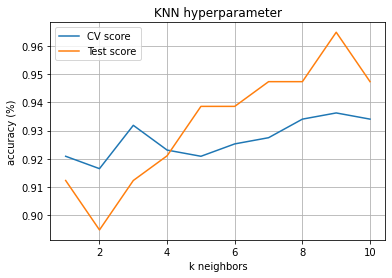

In [1]:
from sklearn.datasets import load_breast_cancer #匯入資料集
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt #匯入 matplotlib

#取得特徵與標籤資料
dx, dy = load_breast_cancer(return_X_y=True) 
dx_train, dx_test, dy_train, dy_test = train_test_split(dx,dy, test_size=0.2, random_state=0)

cv_scores = [] #用來收集交叉驗證準確率的 list
test_scores = [] #用來收集測試集準確率的 list
x = np.arange(10) + 1 #圖表 X 軸 (KNN 模型的 k 值)

for k in x:
  knn = KNeighborsClassifier(n_neighbors=k).fit(dx_train, dy_train)
  cv_scores.append(cross_val_score(knn, dx_train, dy_train, cv=5).mean())
  test_scores.append(knn.score(dx_test, dy_test))

plt.title('KNN hyperparameter')
plt.plot(x, cv_scores, label='CV score') #繪製交叉驗證折線圖
plt.plot(x, test_scores, label='Test score') #繪製測試集預測折線圖
plt.xlabel('k neighbors')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

#13-1-2 用 GridSearchCV 自動搜尋最佳 k 值

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
dx, dy = load_breast_cancer(return_X_y=True)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx,dy, test_size=0.2, random_state=0)

param_grid = {'n_neighbors': np.arange(10) + 1} #要網格搜尋的參數
model = GridSearchCV(KNeighborsClassifier(), param_grid)
model.fit(dx_train, dy_train) #用最佳模型來做訓練

print('Best params:', model.best_params_) #傳回最佳參數
print('CV score:', model.best_score_.round(3))
print('Test score:', model.score(dx_test, dy_test).round(3))

Best params: {'n_neighbors': 9}
CV score: 0.936
Test score: 0.965


#13-2-1 邏輯斯迴歸的 C：常規化強度

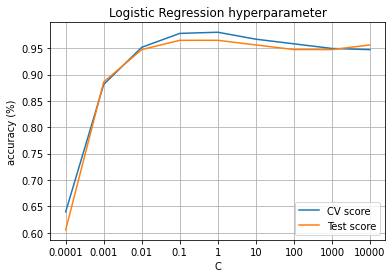

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y=True)
dx_std = StandardScaler().fit_transform(dx) #資料標準化
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std,dy, test_size=0.2, random_state=0)

cv_scores = []
test_scores = []
x = [10 ** n for n in range(-4, 5)]

x_str = [str(n) for n in x] #X 軸各數值『名稱』

for c in x:
  log_reg = LogisticRegression(C=c, max_iter=1000).fit(dx_train, dy_train)
  cv_scores.append(cross_val_score(log_reg, dx_train, dy_train,cv=5).mean())
  test_scores.append(log_reg.score(dx_test, dy_test))

plt.title('Logistic Regression hyperparameter')
plt.plot(x_str, cv_scores, label='CV score')
plt.plot(x_str, test_scores, label='Test score')
plt.xlabel('C')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

#13-2-2 線性 SVC 的 C：常規化強度

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

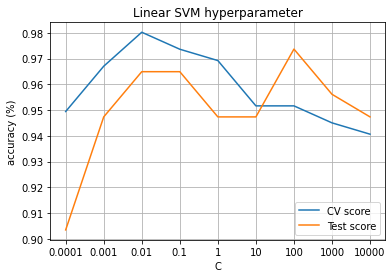

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y=True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=0)

cv_scores = []
test_scores = []
x = [10 ** n for n in range(-4, 5)]
x_str = [str(n) for n in x]

for c in x:
  linear_svc = LinearSVC(C=c, max_iter=10000).fit(dx_train, dy_train)
  cv_scores.append(cross_val_score(linear_svc, dx_train,dy_train, cv=5).mean())
  test_scores.append(linear_svc.score(dx_test, dy_test))

plt.title('Linear SVM hyperparameter')
plt.plot(x_str, cv_scores, label='CV score')
plt.plot(x_str, test_scores, label='Test score')
plt.xlabel('C')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

#13-3-1 C, gamma 與 kernel 參數

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y=True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=0)

x = [10 ** n for n in range(-2, 3)]

param_grid = {'C': x,
         'gamma': x,
         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

model = GridSearchCV(SVC(), param_grid)
model.fit(dx_train, dy_train)

print('Best params: ', model.best_params_)
print('CV score:', model.best_score_.round(3))
print('Test score:', model.score(dx_test, dy_test).round(3))


Best params:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
CV score: 0.982
Test score: 0.982


#13-3-2 使用 RandomizedSearchCV 更快速尋找較適當的參數

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y=True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=0)

param_grid = {'C': np.linspace(1, 100, 100),
        'gamma': np.linspace(0.01, 1, 100),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
model = RandomizedSearchCV(SVC(), param_grid, n_iter=100)
model.fit(dx_train, dy_train)

print('Best params:', model.best_params_)
print('CV score:', model.best_score_.round(3))
print('Test score:', model.score(dx_test, dy_test).round(3))



Best params: {'kernel': 'linear', 'gamma': 0.09999999999999999, 'C': 1.0}
CV score: 0.969
Test score: 0.974


#13-4-1 決策樹的最大深度：max_depth

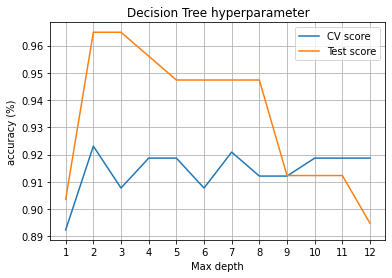

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y=True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=0)

cv_scores = []
test_scores = []
x = np.arange(12) + 1
x_str = [str(n) for n in x]

for d in x:
  tree = DecisionTreeClassifier(max_depth=d).fit(dx_train, dy_train)
  cv_scores.append(cross_val_score(tree, dx_train, dy_train, cv=5).mean())
  test_scores.append(tree.score(dx_test, dy_test))

plt.title('Decision Tree hyperparameter')
plt.plot(x_str, cv_scores, label='CV score')
plt.plot(x_str, test_scores, label='Test score')
plt.xlabel('Max depth')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

dx, dy = load_breast_cancer(return_X_y=True)
feature_names = list(load_breast_cancer().feature_names)

dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=0)

model = DecisionTreeClassifier(max_depth=3).fit(dx_train,dy_train)
print(export_text(model, feature_names=feature_names))



|--- worst concave points <= 0.42
|   |--- worst area <= 0.14
|   |   |--- worst perimeter <= 0.01
|   |   |   |--- class: 1
|   |   |--- worst perimeter >  0.01
|   |   |   |--- class: 1
|   |--- worst area >  0.14
|   |   |--- mean symmetry <= -1.08
|   |   |   |--- class: 1
|   |   |--- mean symmetry >  -1.08
|   |   |   |--- class: 0
|--- worst concave points >  0.42
|   |--- worst area <= -0.27
|   |   |--- mean smoothness <= 0.85
|   |   |   |--- class: 1
|   |   |--- mean smoothness >  0.85
|   |   |   |--- class: 0
|   |--- worst area >  -0.27
|   |   |--- radius error <= -0.82
|   |   |   |--- class: 1
|   |   |--- radius error >  -0.82
|   |   |   |--- class: 0



#13-4-2 隨機森林的規模 n_estimators 與亂數種子 random_state

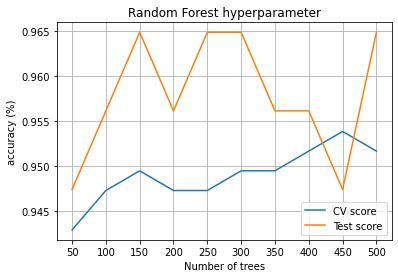

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

dx, dy = load_breast_cancer(return_X_y=True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=0)

cv_scores = []
test_scores = []
x = (np.arange(10) + 1) * 50
x_str = [str(n) for n in x]

for t in x:
  tree = RandomForestClassifier(n_estimators=t, max_depth=3,random_state=0)
  tree.fit(dx_train, dy_train)
  cv_scores.append(cross_val_score(tree, dx_train, dy_train,cv=5).mean())
  test_scores.append(tree.score(dx_test, dy_test))

plt.title('Random Forest hyperparameter')
plt.plot(x_str, cv_scores, label='CV score')
plt.plot(x_str, test_scores, label='Test score')
plt.xlabel('Number of trees')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

